In [25]:
import os
import pandas as pd
from tqdm.notebook import tqdm
import time

LOCAL_HISTORY_DIRECTORY = "observation_files_old/"

def check_missing_protocol_file(file_name, file_names):
    layer_name = file_name.split("-")[1]
    if "http" in file_name:
        corresponding_mqtt_file = file_name.replace("http.csv", "mqtt.csv")
        if corresponding_mqtt_file not in file_names[0]:
            return (1,0,layer_name)
    elif "mqtt" in file_name:
        corresponding_http_file = file_name.replace("mqtt.csv", "http.csv")
        if corresponding_http_file not in file_names[0]:
            return (0,1,layer_name)
    return (0,0,layer_name)
            

thing_directories = [x[0] for x in os.walk(LOCAL_HISTORY_DIRECTORY) if x[0] != LOCAL_HISTORY_DIRECTORY]

total_http_count = 0
total_mqtt_count = 0

only_http = 0
only_mqtt = 0

complete_layer_names_count = {}
only_http_layer_names_count = {}
only_mqtt_layer_names_count = {}

mqtt_layer_names = []
http_layer_names = []

mqtt_things = []
http_things = []

primary_signals_mqtt_df = None
primary_signals_http_df = None

primary_signals_mqtt_dfs = []
primary_signals_http_dfs = []

for thing_directory in tqdm(thing_directories, desc=f'Analyzing..', total=len(thing_directories)):
    thing_name = thing_directory.split("/")[-1]
    file_names = [x[2] for x in os.walk(thing_directory)]
    for file_name in file_names[0]:
        layer_name = file_name.split("-")[1]
        
        # Check for missing protocol files
        only_http_add, only_mqtt_add, layer_name = check_missing_protocol_file(file_name, file_names)
        only_http += only_http_add
        only_mqtt += only_mqtt_add
        if only_http_add == 1:
            if layer_name not in only_http_layer_names_count:
                only_http_layer_names_count[layer_name] = 1
            else:
                only_http_layer_names_count[layer_name] += 1
        elif only_mqtt_add == 1:
            if layer_name not in only_mqtt_layer_names_count:
                only_mqtt_layer_names_count[layer_name] = 1
            else:
                only_mqtt_layer_names_count[layer_name] += 1
        else:
            if layer_name not in complete_layer_names_count:
                complete_layer_names_count[layer_name] = 1
            else:
                complete_layer_names_count[layer_name] += 1
            
        
        # Other imbalance checks
        thing_name_list_to_check = None
        layer_name_list_to_check = None
        if "http" in file_name:
            thing_name_list_to_check = http_things
            layer_name_list_to_check = http_layer_names
            total_http_count += 1
            if "primary_signal" in file_name:
                df = pd.read_csv(thing_directory + "/" + file_name)
                primary_signals_http_dfs.append(df)
        else:
            thing_name_list_to_check = mqtt_things
            layer_name_list_to_check = mqtt_layer_names
            total_mqtt_count += 1
            if "primary_signal" in file_name:
                df = pd.read_csv(thing_directory + "/" + file_name)
                primary_signals_mqtt_dfs.append(df)
        if thing_name not in thing_name_list_to_check:
            thing_name_list_to_check.append(thing_name)
        if layer_name not in layer_name_list_to_check:
            layer_name_list_to_check.append(layer_name)
            
print("Total HTTP: " + str(total_http_count))
print("Total MQTT: " + str(total_mqtt_count))

print("\n")                
            
print("Only HTTP: " + str(only_http))
print("Only MQTT: " + str(only_mqtt))

print("\n")

print("HTTP things: " + str(len(http_things)))
print("MQTT things: " + str(len(mqtt_things)))

print("\n")

http_layer_names.sort()
mqtt_layer_names.sort()

print("HTTP layers: ")
print(http_layer_names)
print("MQTT layers: ")
print(mqtt_layer_names)

print("\n")

all_layer_names = http_layer_names
for layer_name in mqtt_layer_names:
    if layer_name not in all_layer_names:
        all_layer_names.append(layer_name)

print("Layer counts for missing protocol files: ")
for layer_name in all_layer_names:
    print(layer_name + ": ")
    http_only_count = 0 if layer_name not in only_http_layer_names_count else only_http_layer_names_count[layer_name]
    mqtt_only_count = 0 if layer_name not in only_mqtt_layer_names_count else only_mqtt_layer_names_count[layer_name]
    complete_count = 0 if layer_name not in complete_layer_names_count else complete_layer_names_count[layer_name]
    print("Only http count: " + str(http_only_count))
    print("Only mqtt count: " + str(mqtt_only_count))
    print("Complete count: " + str(complete_count))

Analyzing..:   0%|          | 0/17833 [00:00<?, ?it/s]

Total HTTP: 61218
Total MQTT: 48602


Only HTTP: 15190
Only MQTT: 2574


HTTP things: 17826
MQTT things: 17650


HTTP layers: 
['acoustic_signal', 'bus_checkout', 'bus_pre', 'bus_request_point', 'cycle_second', 'detector_acoustic_traffic_request', 'detector_car', 'detector_cyclists', 'detector_pedestrian', 'primary_signal', 'secondary_signal', 'signal_program']
MQTT layers: 
['acoustic_signal', 'bus_checkout', 'bus_pre', 'bus_request_point', 'cycle_second', 'detector_acoustic_traffic_request', 'detector_car', 'detector_cyclists', 'detector_pedestrian', 'primary_signal', 'secondary_signal', 'signal_program']


Layer counts for missing protocol files: 
acoustic_signal: 
Only http count: 485
Only mqtt count: 56
Complete count: 3012
bus_checkout: 
Only http count: 105
Only mqtt count: 0
Complete count: 718
bus_pre: 
Only http count: 98
Only mqtt count: 2
Complete count: 588
bus_request_point: 
Only http count: 117
Only mqtt count: 0
Complete count: 668
cycle_second: 
Only http count: 4422


In [27]:
# Dump list of dataframes into intermediate file
primary_signals_mqtt_dfs = None
primary_signals_http_df = pd.concat(primary_signals_http_dfs)

primary_signals_http_df.to_csv("primary_signals_http.csv", index=False)

In [5]:
import pandas as pd

# Read csvs from file
primary_signals_http_df = pd.read_csv("primary_signals_http.csv")
primary_signals_mqtt_df = pd.read_csv("primary_signals_mqtt.csv")

HTTP NA values: 
phenomenonTime    0
resultTime        0
receivedTime      0
result            0
dtype: int64
MQTT NA values: 
phenomenonTime    0
resultTime        0
receivedTime      0
result            0
dtype: int64


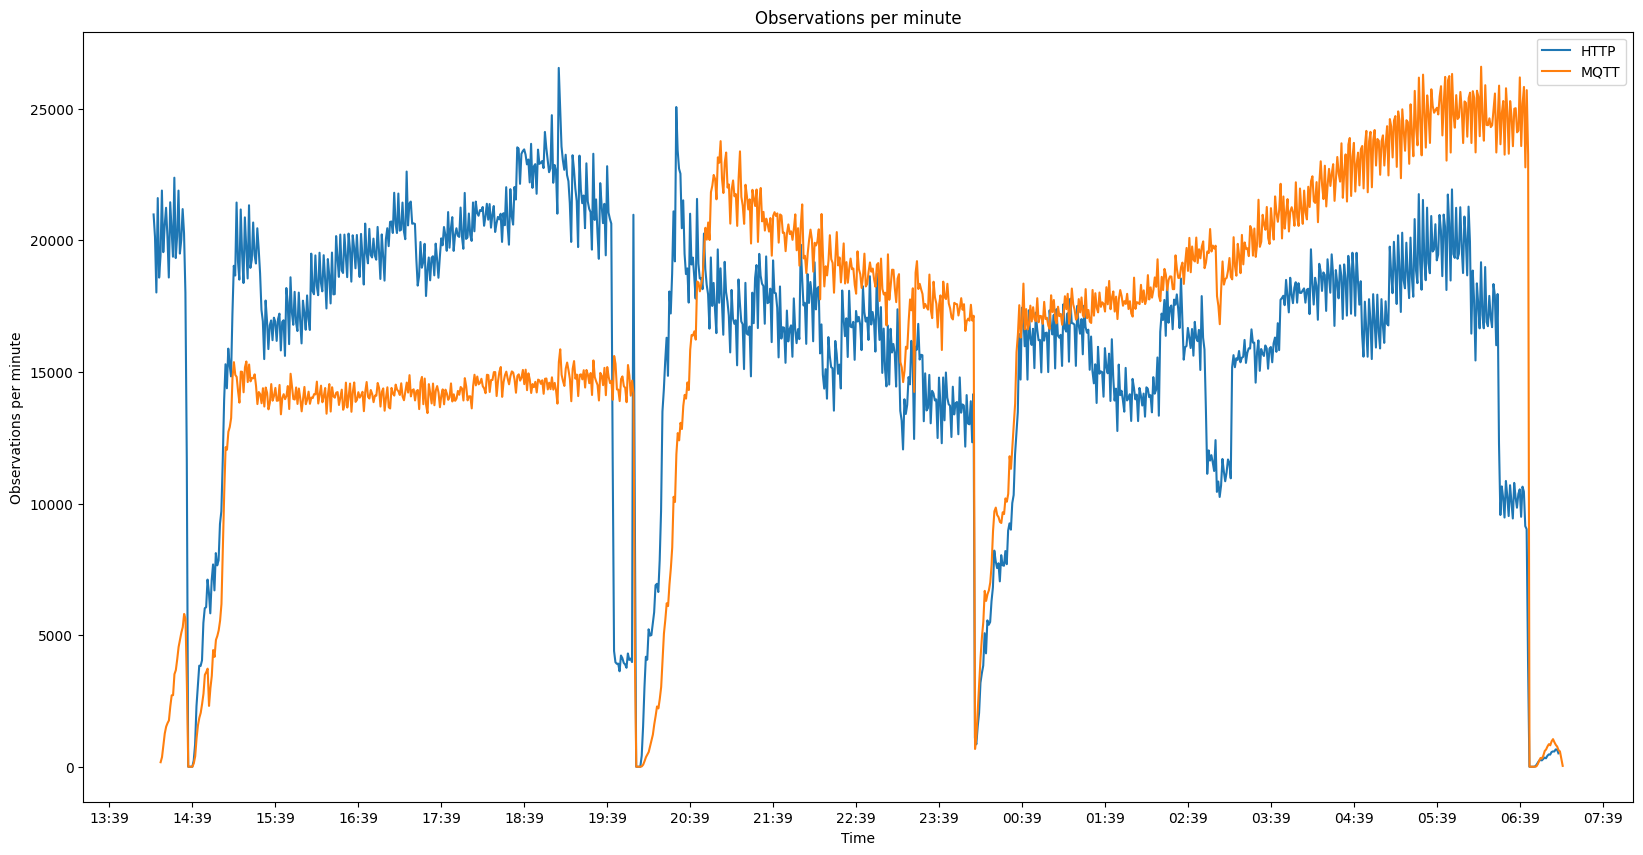

In [27]:
import pandas as pd

# Convert first three columns to datetime (date format is "2006-01-02T15:04:05.000Z")
primary_signals_http_df['phenomenonTime'] = pd.to_datetime(primary_signals_http_df['phenomenonTime'], format='%Y-%m-%dT%H:%M:%SZ')
primary_signals_http_df['resultTime'] = pd.to_datetime(primary_signals_http_df['resultTime'], format='mixed')
primary_signals_http_df['receivedTime'] = pd.to_datetime(primary_signals_http_df['receivedTime'], format='mixed')
primary_signals_mqtt_df['phenomenonTime'] = pd.to_datetime(primary_signals_mqtt_df['phenomenonTime'], format='%Y-%m-%dT%H:%M:%SZ')
primary_signals_mqtt_df['resultTime'] = pd.to_datetime(primary_signals_mqtt_df['resultTime'], format='mixed')
primary_signals_mqtt_df['receivedTime'] = pd.to_datetime(primary_signals_mqtt_df['receivedTime'], format='mixed')

# Check if NA values exist
print("HTTP NA values: ")
print(primary_signals_http_df.isna().sum())
print("MQTT NA values: ")
print(primary_signals_mqtt_df.isna().sum())

# Sort by resultTime
primary_signals_http_df = primary_signals_http_df.sort_values(by=['resultTime'])
primary_signals_mqtt_df = primary_signals_mqtt_df.sort_values(by=['resultTime'])

# Eliminate rows where the resultTime is a duplicate
primary_signals_http_df = primary_signals_http_df.drop_duplicates(subset=['phenonemonTime'])
primary_signals_mqtt_df = primary_signals_mqtt_df.drop_duplicates(subset=['phenonemonTime'])

first_result_time_http = primary_signals_http_df['resultTime'].iloc[0]
first_result_time_mqtt = primary_signals_mqtt_df['resultTime'].iloc[0]

last_result_time_http = primary_signals_http_df['resultTime'].iloc[-1]
last_result_time_mqtt = primary_signals_mqtt_df['resultTime'].iloc[-1]

# Iterate minute by minute and check for missing data
current_time_http = first_result_time_http
current_time_mqtt = first_result_time_mqtt

observations_per_minute_http = pd.DataFrame({
    'time': pd.Series(dtype='datetime64[ns]'),
    'count': pd.Series(dtype='int')
})

observations_per_minute_mqtt = pd.DataFrame({
    'time': pd.Series(dtype='datetime64[ns]'),
    'count': pd.Series(dtype='int')
})

while current_time_http < last_result_time_http:
    # Get all observations within the current minute
    observations_in_current_minute_http = primary_signals_http_df[(primary_signals_http_df['resultTime'] >= current_time_http) & (primary_signals_http_df['resultTime'] < current_time_http + pd.Timedelta(minutes=1))]
    observations_per_minute_http = pd.concat([observations_per_minute_http, pd.DataFrame({'time': [current_time_http], 'count': [len(observations_in_current_minute_http)]})])
    current_time_http = current_time_http + pd.Timedelta(minutes=1)
    
while current_time_mqtt < last_result_time_mqtt:
    # Get all observations within the current minute
    observations_in_current_minute_mqtt = primary_signals_mqtt_df[(primary_signals_mqtt_df['resultTime'] >= current_time_mqtt) & (primary_signals_mqtt_df['resultTime'] < current_time_mqtt + pd.Timedelta(minutes=1))]
    observations_per_minute_mqtt = pd.concat([observations_per_minute_mqtt, pd.DataFrame({'time': [current_time_mqtt], 'count': [len(observations_in_current_minute_mqtt)]})])
    current_time_mqtt = current_time_mqtt + pd.Timedelta(minutes=1)
    
# Plot the results in a line graph
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(observations_per_minute_http['time'], observations_per_minute_http['count'], label='HTTP')
ax.plot(observations_per_minute_mqtt['time'], observations_per_minute_mqtt['count'], label='MQTT')
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=60))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time')
ax.set_ylabel('Observations per minute')
ax.set_title('Observations per minute')
ax.legend()
plt.show()

    

In [26]:
print(first_result_time_http)
print(first_result_time_mqtt)
print(last_result_time_http)
print(last_result_time_mqtt)



2023-09-06 14:10:57.149746+00:00
2023-09-06 14:16:01.671987+00:00
2023-09-07 07:07:43.859728+00:00
2023-09-07 07:10:24.996454+00:00
